# BigMart Sales Predicition

In [1]:
#importing modules to perform operations
import pandas as pd
import numpy as np
%matplotlib inline     
#magic function in IPython  In[101]
import matplotlib.pyplot as plt     # is a collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns

### Adding dataset using pandas

In [2]:
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [3]:
df_train.head() #display the first five rows of the dataset Train.csv

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head() #display the first five rows of the dataset Train.csv

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory data analysis

## Missing values

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info() #provides deatils of data types,non-null count of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
df_train.describe() # provides the count,mean value,standard deviation,min,max, Percentaile(25th,50th,75th,)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Below list are of object type whose mean cannot be computed as its a categorical value

In [10]:
df_train. Item_Fat_Content.value_counts() #provides count of all unique values 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
df_train. Item_Type.value_counts() #provides count of all unique values 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
df_train. Outlet_Identifier.value_counts() #provides count of all unique values 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [13]:
df_train.Outlet_Size.value_counts() #provides count of all unique values 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df_train.Outlet_Type.value_counts() #provides count of all unique values 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
df_train.Outlet_Location_Type.value_counts() #provides count of all uniLocation_Typevalues 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

## Filling the missing values in categorical and numerical values

## 1.For categorical Values

In [16]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [17]:
df_train.isnull().sum() #all object null values is replaced expect item_weight which is a numerical type

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df_test.isnull().sum() #all object null values is replaced expect item_weight which is a numerical type

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

## 2.For numerical values

In [19]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)  #replacing null values with mean values
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [20]:
df_train.isnull().sum() #all object null values is replaced

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_test.isnull().sum() #all object null values is replaced 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

 ### Dropping unwanted columns Item_Identifier, Outlet_identifier

In [22]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [23]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [24]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.857645,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


 ## Another method for data cleaning in detail report

In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train, title ="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### One-hot Enconding

In [26]:
from sklearn.preprocessing import OneHotEncoder
x = df_train

In [27]:
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#  Data Visualization

<AxesSubplot: >

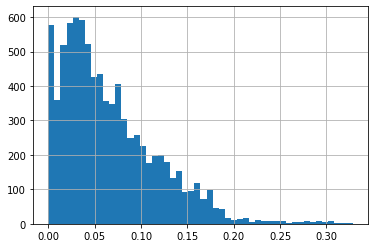

In [28]:
df_train.Item_Visibility.hist(bins=50)

<AxesSubplot: >

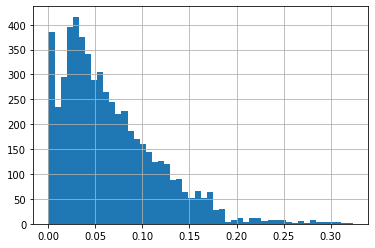

In [29]:
df_test.Item_Visibility.hist(bins=50)

<AxesSubplot: >

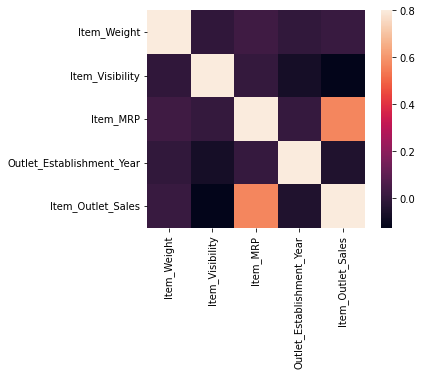

In [30]:
correlation=df_train.corr()
sns.heatmap(correlation,vmax=.8,square=True)

<AxesSubplot: >

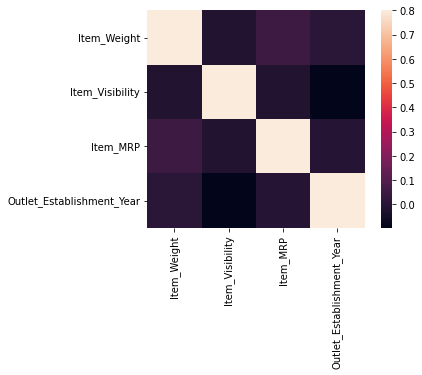

In [31]:
correlation=df_test.corr()
sns.heatmap(correlation,vmax=.8,square=True)

<AxesSubplot: xlabel='Item_Weight'>

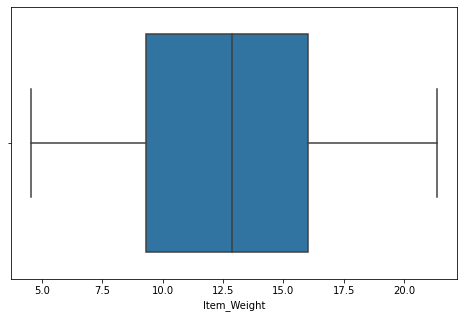

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train['Item_Weight'])

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

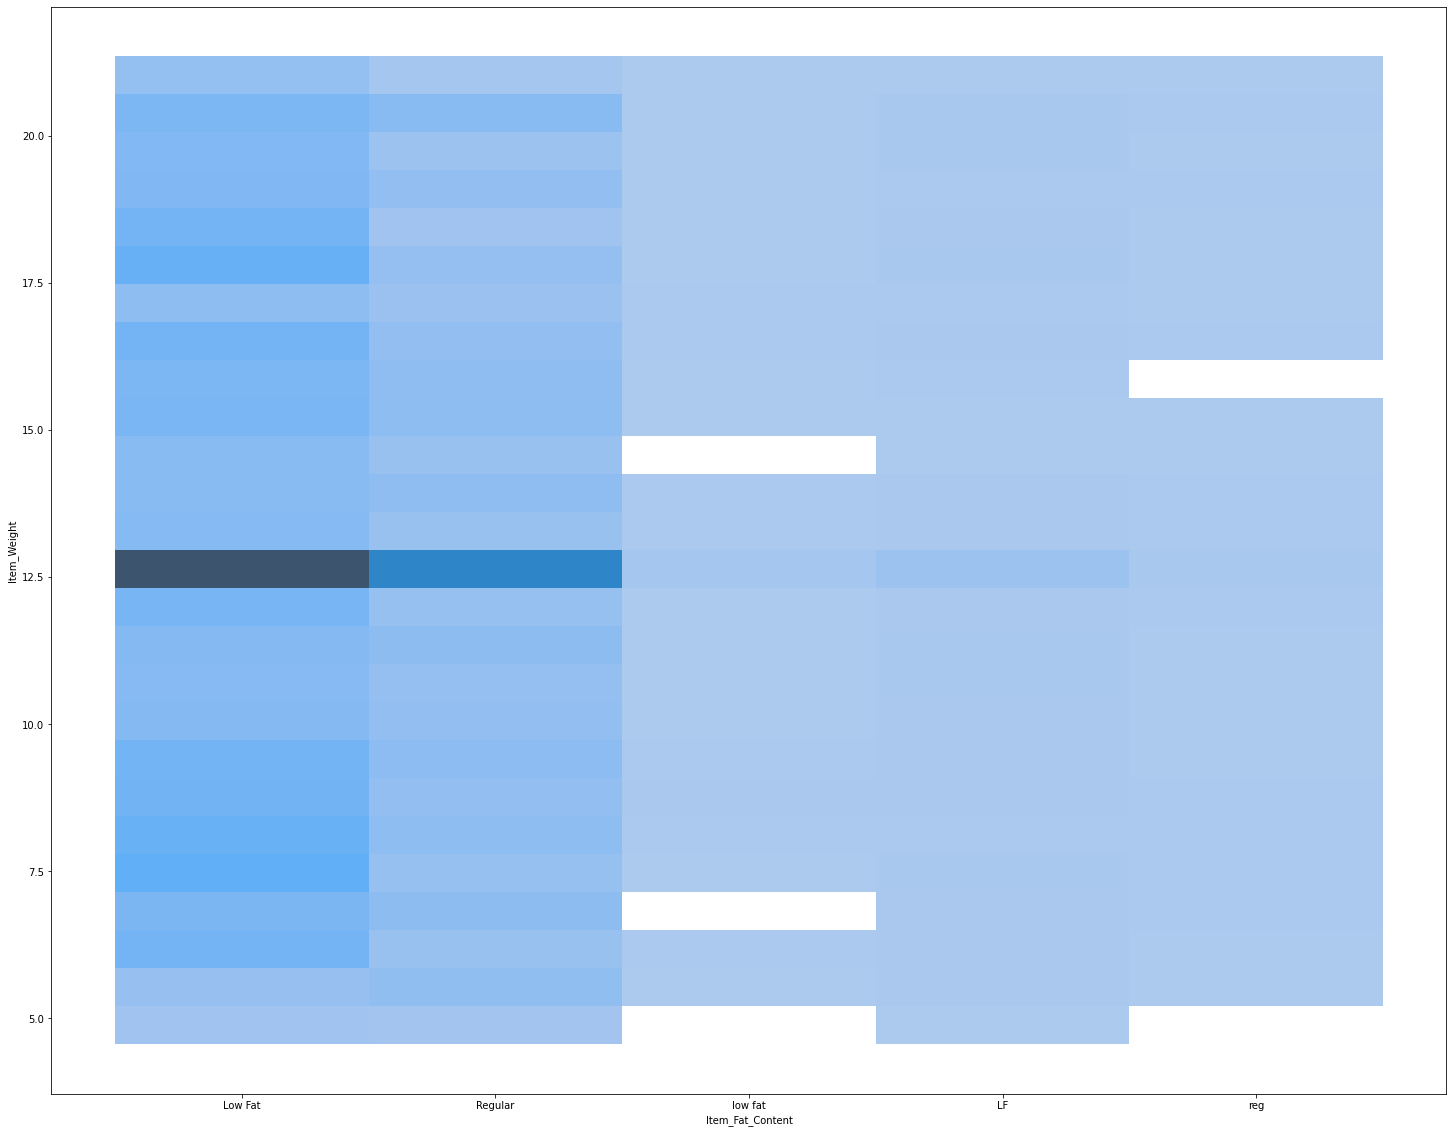

In [33]:
plt.figure(figsize=(25,20))
sns.histplot(y=df_train['Item_Weight'],x=df_train['Item_Fat_Content'],)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

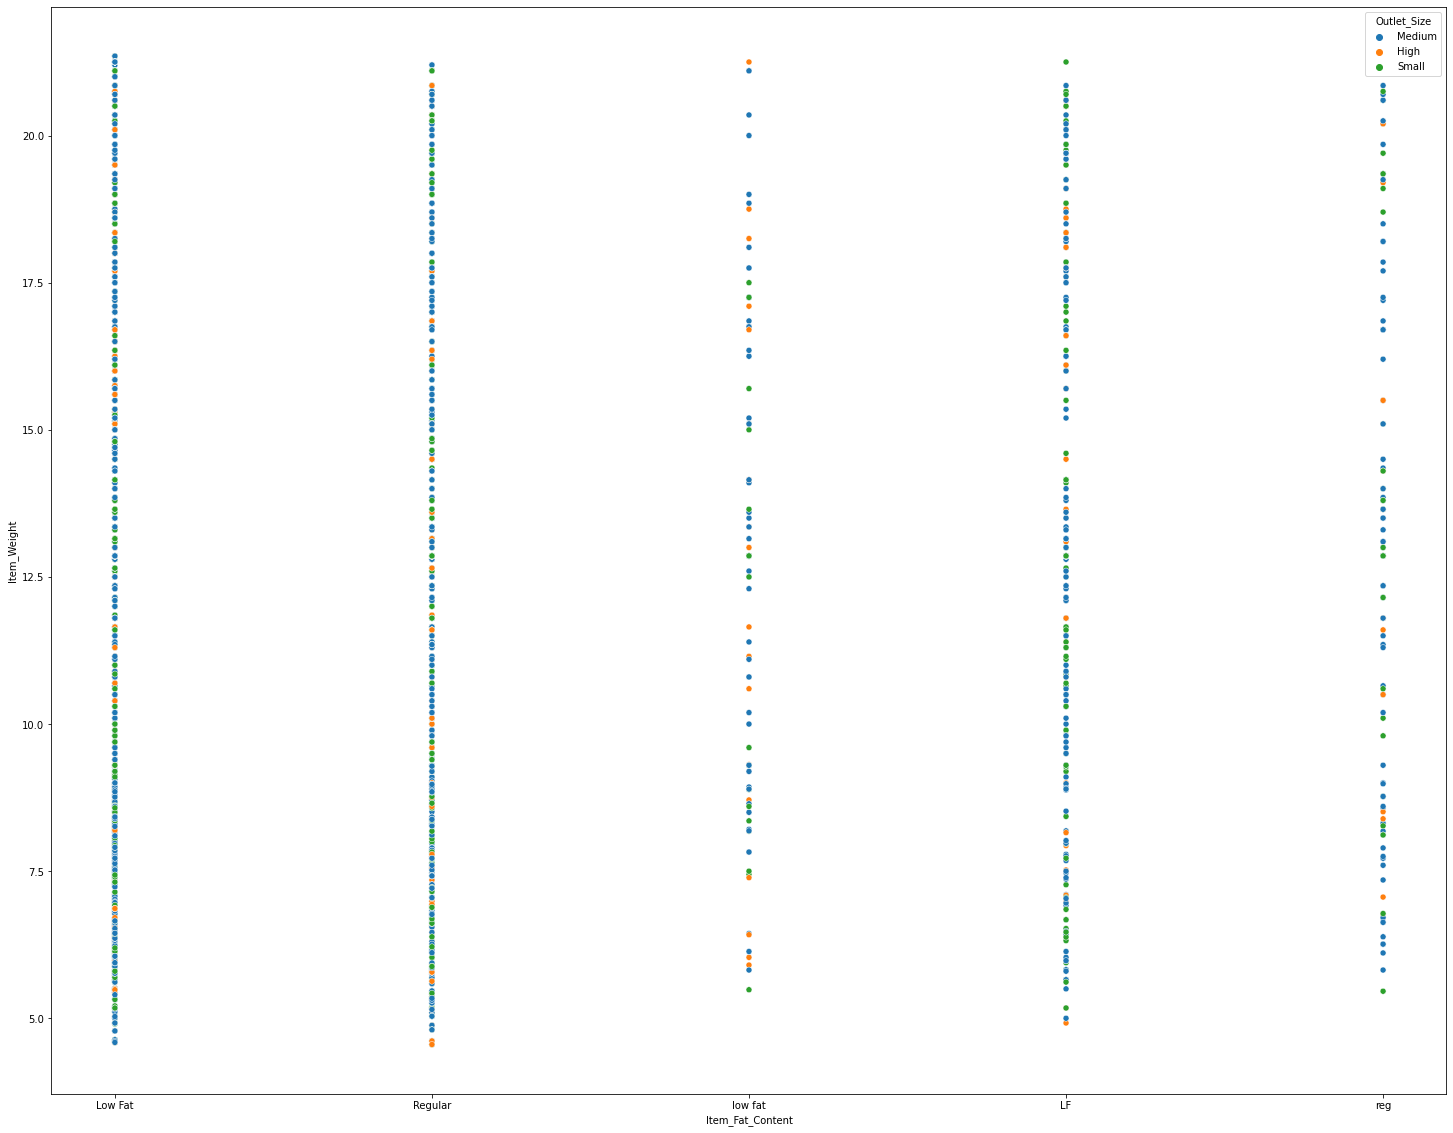

In [34]:
plt.figure(figsize=(25,20))
sns.scatterplot(y=df_train['Item_Weight'],x=df_train['Item_Fat_Content'],hue=df_train['Outlet_Size'])

D:\anconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

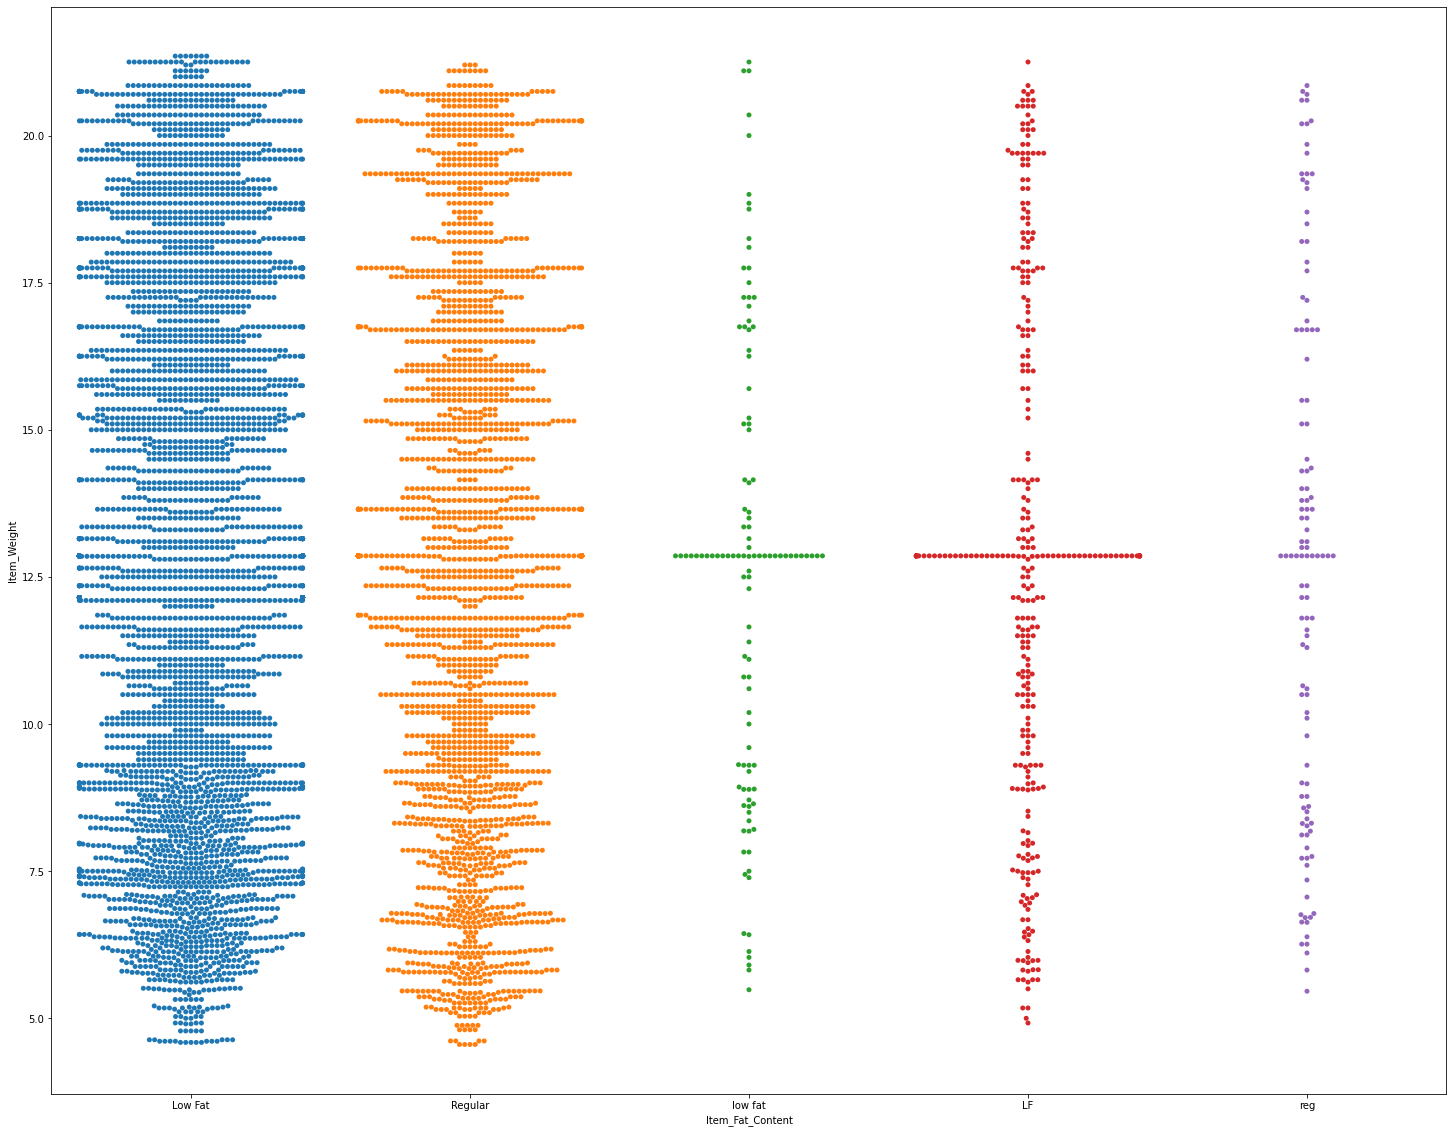

In [35]:
plt.figure(figsize=(25,20))
sns.swarmplot(y=df_train['Item_Weight'],x=df_train['Item_Fat_Content'],)

In [36]:
df_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


 ## EDA USing Klib

In [37]:
import klib

In [38]:
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols,

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [39]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also call

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [41]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [42]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Preprocessing Task before Model Building

## 1) Label encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [45]:
df_train.head(5)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200


## 2) Split Data Into train and test files 

In [46]:
X=df_train.drop('item_outlet_sales',axis=1)

In [47]:
Y=df_train['item_outlet_sales']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [49]:
X.describe()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858088,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226130,0.644810,0.051598,4.209990,62.275051,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [50]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [51]:
X_train_std= sc.fit_transform(X_train)  # learning how the data is in X train and then transforming

In [52]:
X_test_std= sc.transform(X_test)

In [53]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [54]:
X_test_std

array([[-0.43860916, -0.57382672, -0.21609253, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570184, -0.57382672, -0.52943464, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.2184578 ,  0.97378032,  0.16277341, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508101, -0.57382672,  0.8782423 , ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171909, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558541,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [55]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [56]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

# Model building

In [57]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1


In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [60]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [61]:
Y_pred_lr=lr.predict(X_test_std)

In [62]:
r1 =r2_score(Y_test,Y_pred_lr)

In [63]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875773270634
880.99990440845
1162.4412631603452


# Random Forest Regressor 

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [65]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [66]:
Y_pred_rf= rf.predict(X_test_std)

In [67]:
r2=r2_score(Y_test,Y_pred_rf)

In [68]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.546191195559923
787.3002647293628
1112.1126339367167


# XG Boost Regressor

In [69]:
from xgboost import XGBRegressor
xg= XGBRegressor()

In [70]:
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
Y_pred_xg= xg.predict(X_test_std)

In [72]:
r3= r2_score(Y_test,Y_pred_xg)

In [73]:
print(r2_score(Y_test,Y_pred_xg))
print(mean_absolute_error(Y_test,Y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_xg)))

0.5313160637898305
800.45557
1130.1923


## Regularized linear regression

# Ridge

In [74]:
from sklearn.linear_model import Ridge,Lasso


In [75]:
alg2 = Ridge(alpha=0.05,normalize=True)
alg2.fit(X_train_std, Y_train)
Y_pred_rde = alg2.predict(X_test_std)


In [76]:
Y_pred_rde = alg2.predict(X_test_std)

In [77]:
r4= r2_score(Y_test,Y_pred_rde)

In [78]:
print(r2_score(Y_test,Y_pred_rde))
print(mean_absolute_error(Y_test,Y_pred_rde))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rde)))

0.5030400056128097
879.2945069654178
1163.7857370559914


 ## Lasso

In [79]:
alg2 = Lasso(alpha=0.05,normalize=True)
alg2.fit(X_train_std, Y_train)
Y_pred_las = alg2.predict(X_test_std)

In [80]:
r5 = r2_score(Y_test,Y_pred_las)

In [81]:
print(r2_score(Y_test,Y_pred_las))
print(mean_absolute_error(Y_test,Y_pred_las))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_las)))

0.5043055793244262
880.2989563014839
1162.3029260119476


# Hyper parameter tuning

In [82]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)


grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.516 (0.006) with: {'n_estimators': 10}
0.544 (0.005) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [83]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [84]:
grid_search_forest.best_score_

0.5501986305680988

In [85]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [86]:
r6=r2_score(Y_test,Y_pred_rf_grid)

# Model results

In [87]:
metric_results= {'Model': ['linear Regression','RandomForest','XgBoost','Ridge','Lasso','Hyper'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.504188
1,RandomForest,0.546191
2,XgBoost,0.531316
3,Ridge,0.503040
4,Lasso,0.504306
5,Hyper,0.549337


# Plotting Result

### Random forest

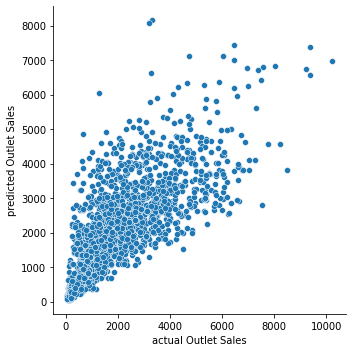

In [88]:
prediction= pd.DataFrame({'actual Outlet Sales': Y_test, 'predicted Outlet Sales': Y_pred_rf})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

### Linear regression

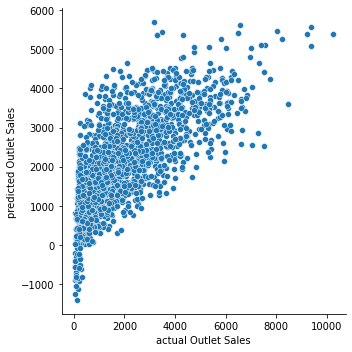

In [89]:
prediction= pd.DataFrame({'actual Outlet Sales': Y_test, 'predicted Outlet Sales': Y_pred_lr})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

### XG Boost Regressor

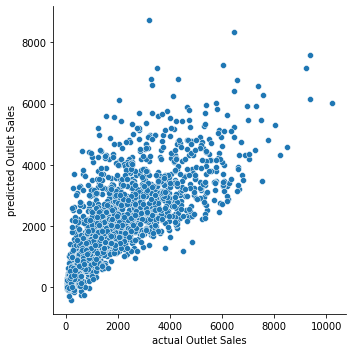

In [90]:
prediction= pd.DataFrame({'actual Outlet Sales': Y_test, 'predicted Outlet Sales': Y_pred_xg})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## Ridge

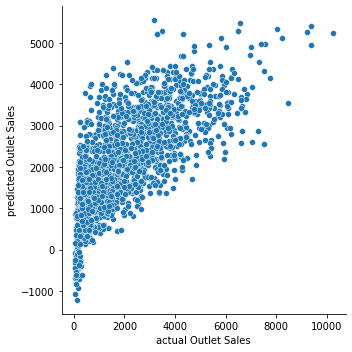

In [91]:
prediction= pd.DataFrame({'actual Outlet Sales': Y_test, 'predicted Outlet Sales': Y_pred_rde})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## Lasso

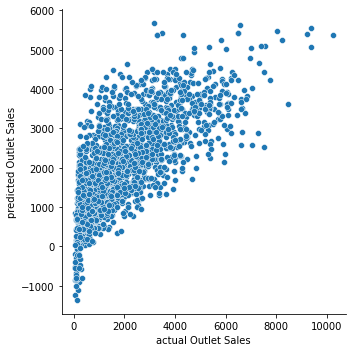

In [92]:
prediction= pd.DataFrame({'actual Outlet Sales': Y_test, 'predicted Outlet Sales': Y_pred_las})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

 ## #Hyper parameter Tuning 

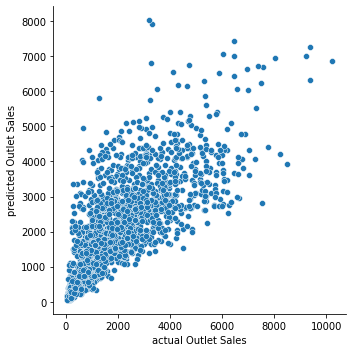

In [93]:
prediction= pd.DataFrame({'actual Outlet Sales': Y_test, 'predicted Outlet Sales': Y_pred_rf_grid})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

# saving the model

In [94]:
import joblib
Bigmart = 'finalized_model.sav'
joblib.dump(alg2, open(Bigmart, 'wb'))